In [ ]:
!pip install wordcloud --q

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Reading the CSV file 'train.csv' into a DataFrame with ISO-8859-1 encoding
df=pd.read_csv('/content/train.csv', encoding='ISO-8859-1')

In [ ]:
# Displaying the first five rows of the DataFrame
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [ ]:
# Displaying the last five rows of the DataFrame
df.tail()

,category,sub_category,crimeaditionalinfo
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...
93685,Online Financial Fraud,Fraud CallVishing,There is app name koko loan app they send the ...


**Sanity Check of Data**

In [ ]:
# Displaying the dimensions (number of rows and columns) of the DataFrame
df.shape

(93686, 3)

In [ ]:
# Displaying a summary of the DataFrame, including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [ ]:
# Checking for missing values in each column of the DataFrame and summing the null value
df.isnull().sum()

,0
category,0
sub_category,6591
crimeaditionalinfo,21


In [ ]:
# Calculate the percentage of missing values (NaNs) for each column in the DataFrame
df.isnull().sum()/df.shape[0]*100

,0
category,0.000000
sub_category,7.035203
crimeaditionalinfo,0.022415


In [ ]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

7803

In [ ]:
# Iterate through object-type columns and print their value counts
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())  # Show frequency of unique values in the column
    print("*" * 10)  # Separator for clarity

category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64
**********
sub_category
UPI Related

In [ ]:
# Descriptive statistics for non-numerical (object-type) columns
df.describe(include='object')

,category,sub_category,crimeaditionalinfo
count,93686,87095,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57434,26856,2342


In [ ]:
# Descriptive statistics for object-type columns and transpose the output for improved readability
df.describe(include='object').T

,count,unique,top,freq
category,93686,15,Online Financial Fraud,57434
sub_category,87095,35,UPI Related Frauds,26856
crimeaditionalinfo,93665,85013,Respected Sir\r\n\r\nA very serious matter I w...,2342


In [ ]:
# Group by 'category' and 'sub_category', and count occurrences of a specific column
df.groupby(['category', 'sub_category']).count()

crimeaditionalinfo
category                                       sub_category                                                          
Any Other Cyber Crime                          Other                                                            10877
Cryptocurrency Crime                           Cryptocurrency Fraud                                               480
Cyber Attack/ Dependent Crimes                 Data Breach/Theft                                                  484
                                               Denial of Service (DoS)/Distributed Denial of S...                 504
                                               Hacking/Defacement                                                 540
                                               Malware Attack                                                     521
                                               Ransomware Attack                                                  534
                                               SQL Injection                                                      508
                                               Tampering with computer source documents                           517
Cyber Terrorism                                Cyber Terrorism                                                    161
Hacking  Damage to computercomputer system etc Damage to computer computer systems etc                            108
                                               Email Hacking                                                      349
                                               Tampering with computer source documents                            50
                                               Unauthorised AccessData Breach                                    1114
                                               Website DefacementHacking                                           89
Online Cyber Trafficking                       Online Trafficking                                                 183
Online Financial Fraud                         Business Email CompromiseEmail Takeover                            290
                                               DebitCredit Card FraudSim Swap Fraud                             10802
                                               DematDepository Fraud                                              761
                                               EWallet Related Fraud                                             4047
                                               Fraud CallVishing                                                 5802
                                               Internet Banking Related Fraud                                    8871
                                               UPI Related Frauds                                               26843
Online Gambling  Betting                       Online Gambling  Betting                                           444
Online and Social Media Related Crime          Cheating by Impersonation                                         1987
                                               Cyber Bullying  Stalking  Sexting                                 4089
                                               EMail Phishing                                                     157
                                               FakeImpersonating Profile                                         2299
                                               Impersonating Email                                                 44
                                               Intimidating Email                                                  29
                                               Online Job Fraud                                                   912
                                               Online Matrimonial Fraud                                           132
                                               Profile Hacking Identity Theft          

**(1) Bar Plot Visualization for Category Distribution**

<ipython-input-17-9919d59e3742>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='category', y='count', data=category_counts, palette=palette)


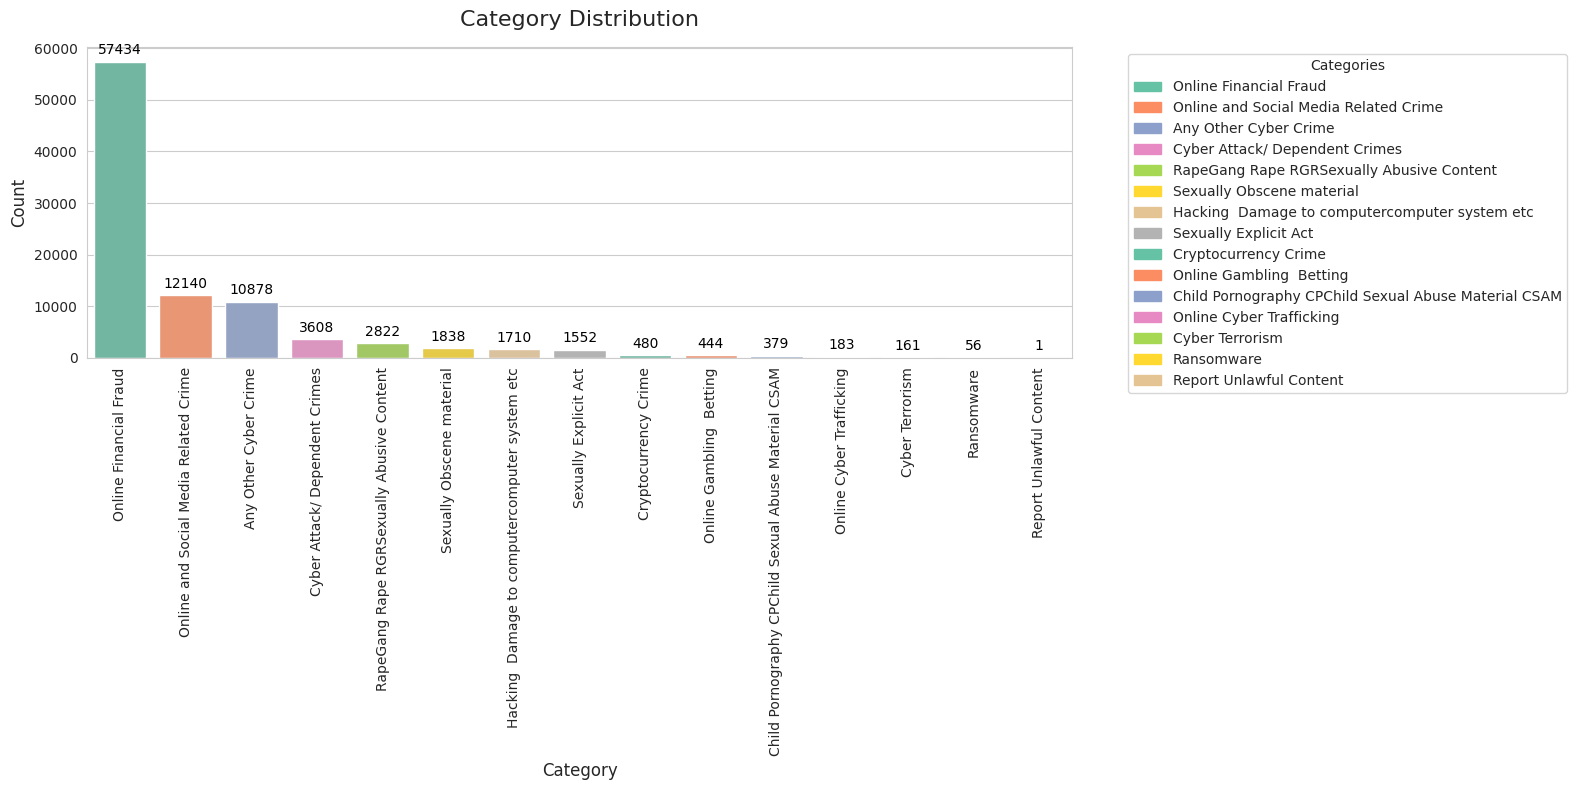

In [ ]:
# Prepare the data
category_counts = df['category'].value_counts().reset_index(name='count')
category_counts.columns = ['category', 'count']

# Set up the figure size and style
plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')

# Create the bar plot with a distinct color palette
palette = sns.color_palette('Set2', n_colors=len(category_counts))
barplot = sns.barplot(x='category', y='count', data=category_counts, palette=palette)

# Add labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Category Distribution', fontsize=16, pad=15)

# Rotate the category labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Display count values on top of the bars
for p in barplot.patches:
    bar_height = p.get_height()
    barplot.annotate(
        f'{int(bar_height)}',
        (p.get_x() + p.get_width() / 2, bar_height),
        ha='center', va='bottom',
        fontsize=10, color='black',
        xytext=(0, 3), textcoords="offset points"
    )

# Add a legend using list comprehension for handles
handles = [mpatches.Patch(color=palette[i], label=category) for i, category in enumerate(category_counts['category'])]
plt.legend(handles=handles, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()

**(2) Bar Plot Visualization for Sub-Category Distribution**

<ipython-input-19-17419dfefe9c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


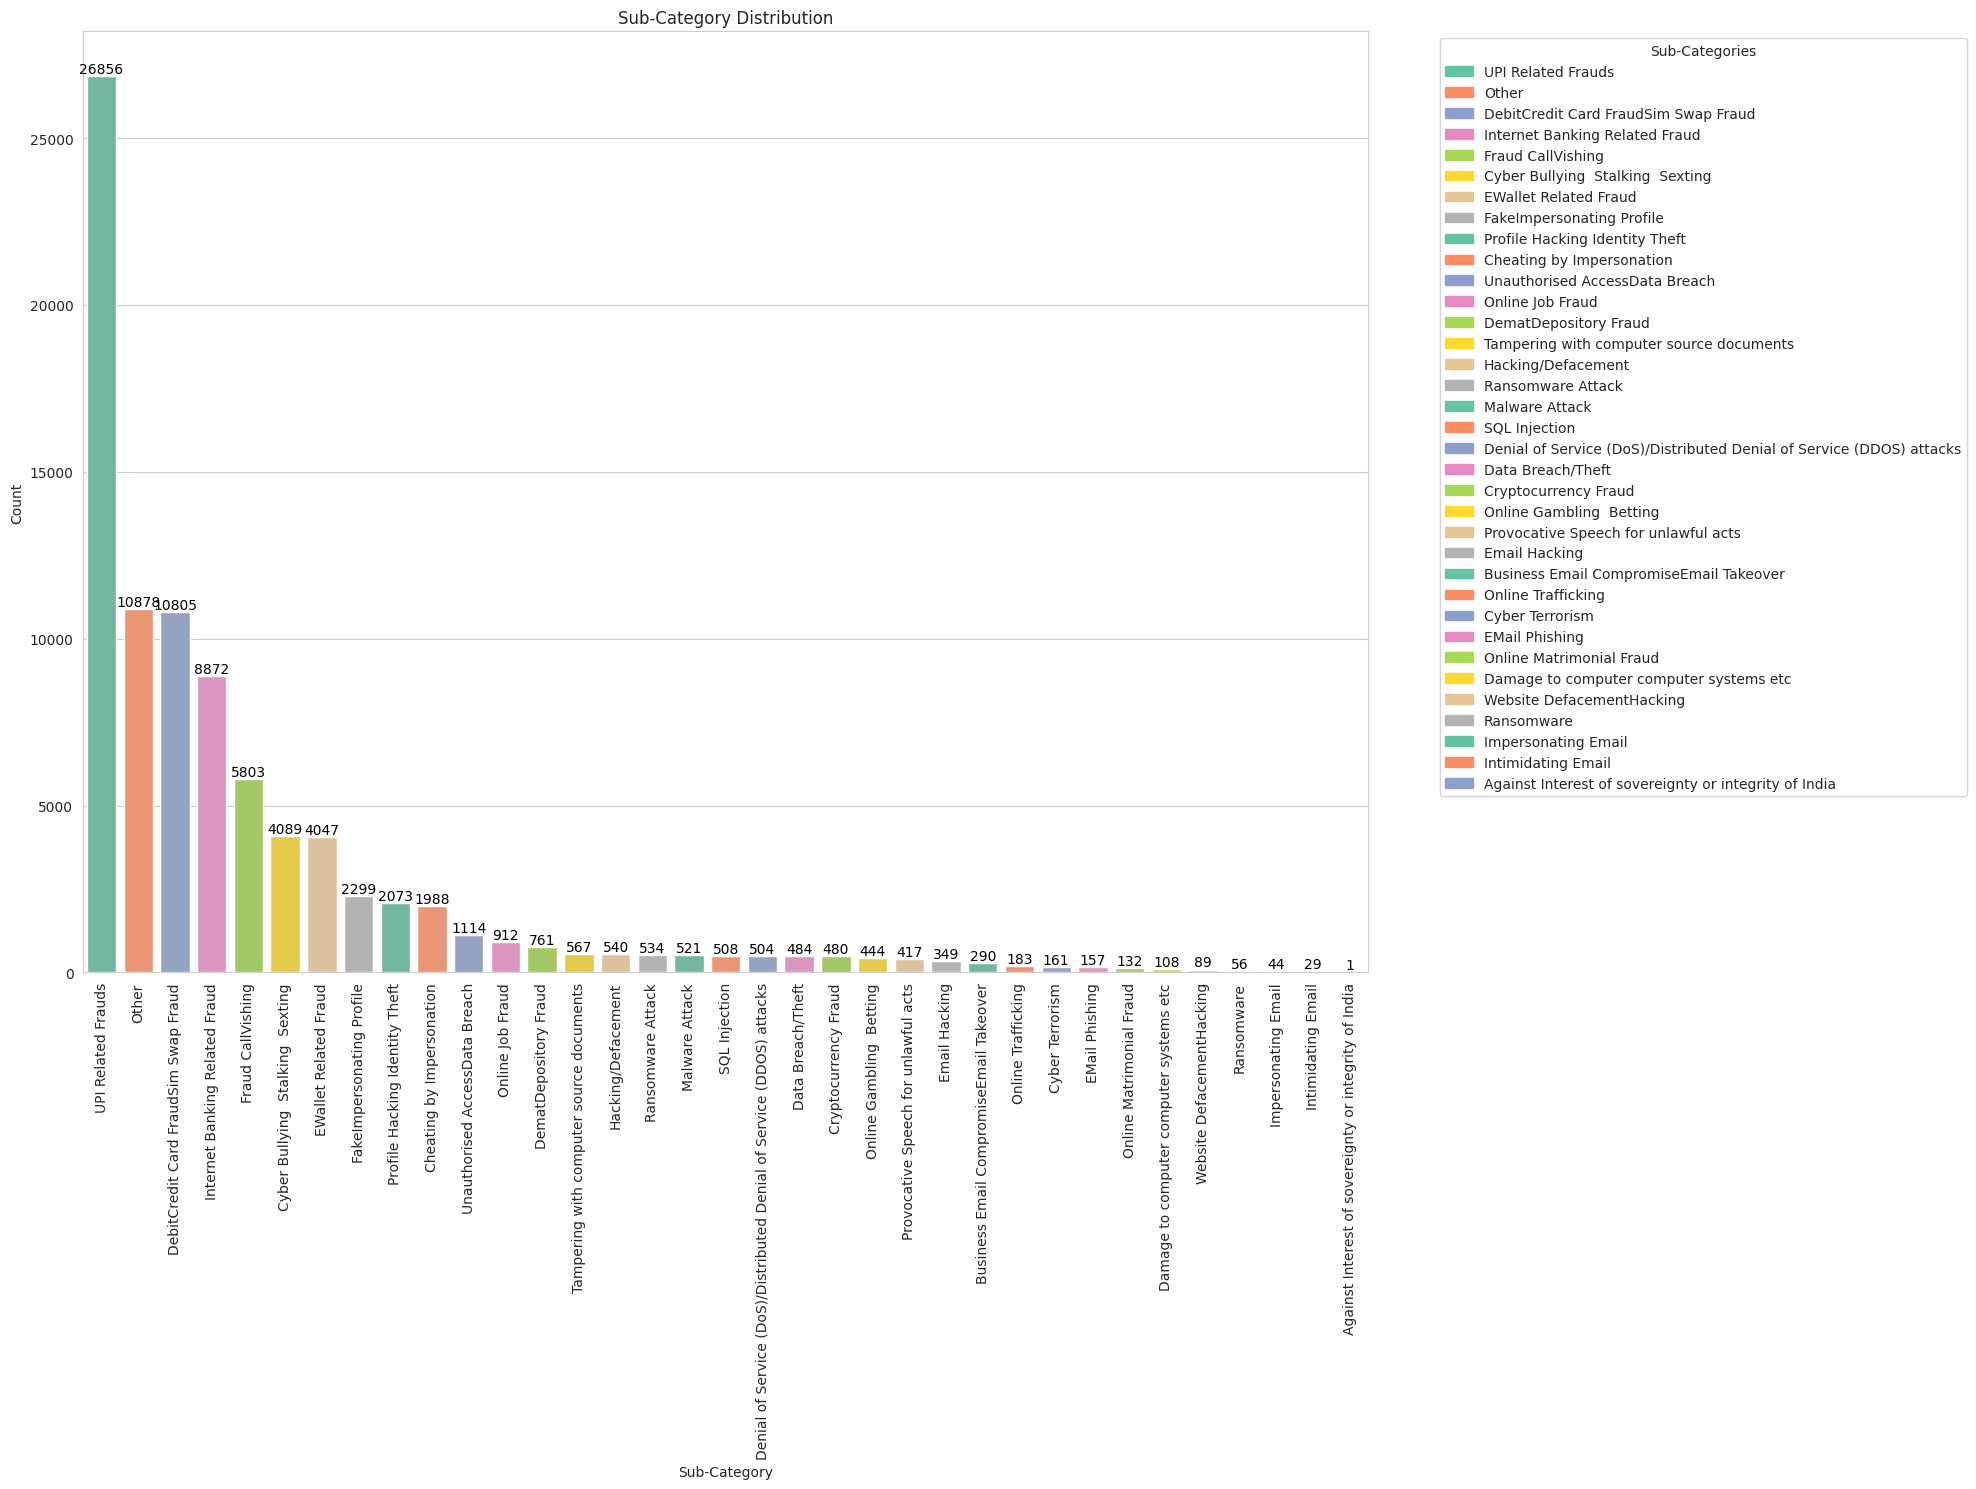

In [ ]:
# Prepare the data
subcategory_counts = df['sub_category'].value_counts().reset_index()
subcategory_counts.columns = ['sub_category', 'count']

# Create a color palette with distinct colors for each category
palette = sns.color_palette('Set2', n_colors=len(subcategory_counts))

# Set up the figure and bar plot
plt.figure(figsize=(20, 15))
sns.barplot(
    x='sub_category',
    y='count',
    data=subcategory_counts,
    palette=palette
)

# Add labels, title, and adjust x-axis ticks
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Sub-Category Distribution')
plt.xticks(rotation=90)

# Annotate the bars with their counts
for index, row in subcategory_counts.iterrows():
    plt.text(
        x=index,
        y=row['count'] + 0.5,
        s=row['count'],
        ha="center",
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add a legend manually
legend_patches = [
    mpatches.Patch(color=palette[i], label=subcategory_counts['sub_category'][i])
    for i in range(len(subcategory_counts))
]
plt.legend(handles=legend_patches, title='Sub-Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


**(3) Word Cloud Visualization for Category Distribution**


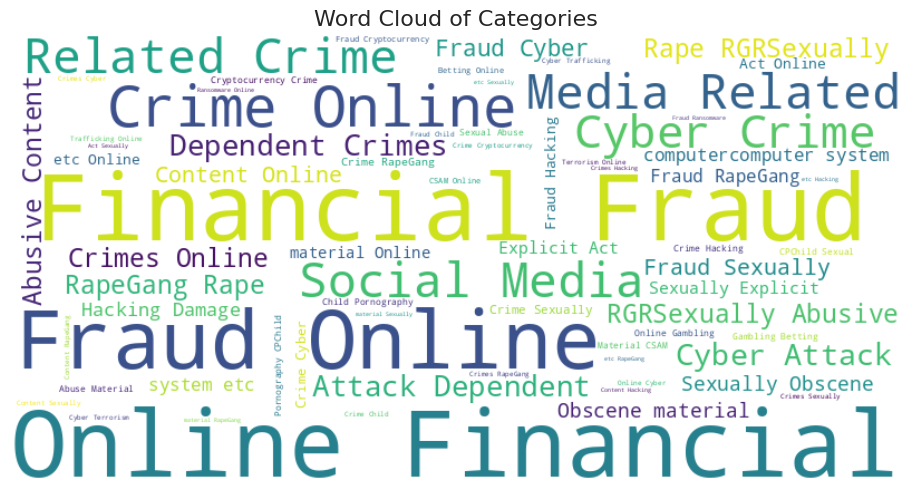

In [ ]:
# Join all category values into a single string
text = ' '.join(df['category'])

# Generate and configure the word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Categories', fontsize=16)
plt.tight_layout()
plt.show()

**(4) Word Cloud Visualization for Sub-Categories Distribution**


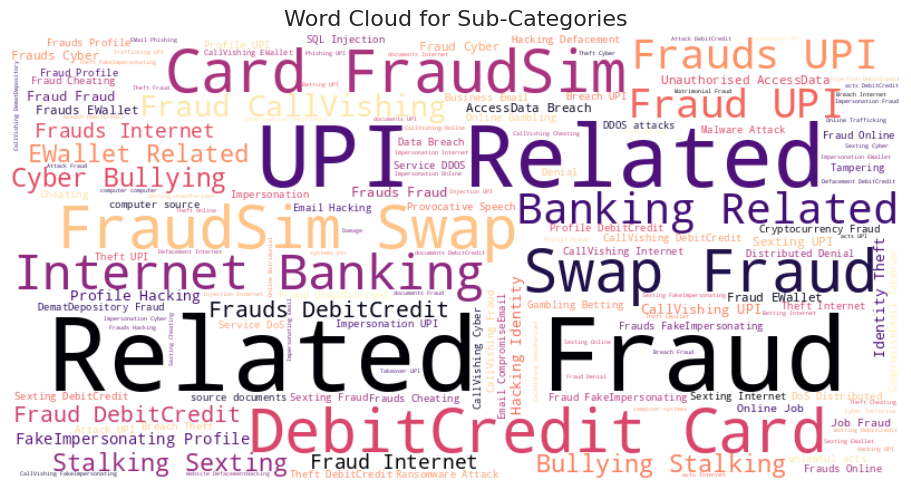

In [ ]:
# Join non-null sub-category values into a single string
text = " ".join(df['sub_category'].dropna())

# Generate the word cloud with customized settings
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    colormap='magma', max_words=150, contour_color='black', contour_width=1
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Cloud for Sub-Categories", fontsize=16)
plt.tight_layout()
plt.show()

**(5) Word Cloud Visualization for Crime Descriptions**

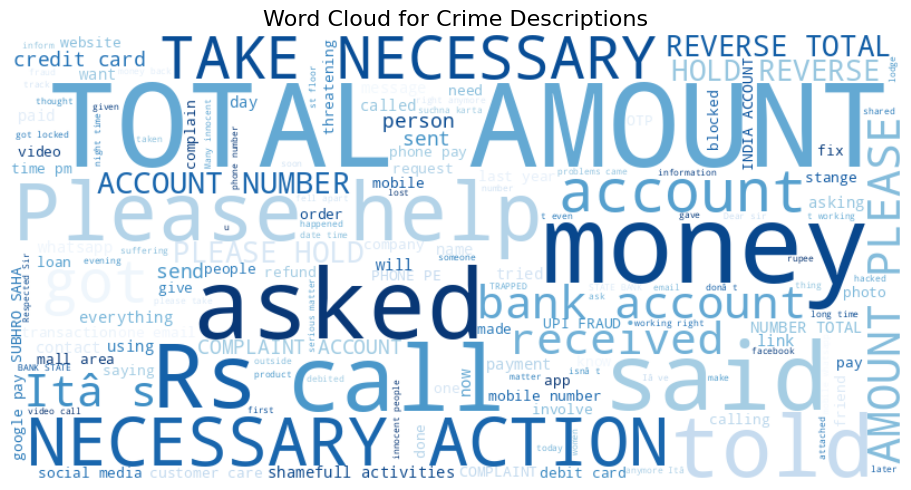

In [ ]:
# Join non-null crime data into a string
text = " ".join(df['crimeaditionalinfo'].dropna())

# Generate word cloud with a white background and dark theme
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    colormap='Blues', max_words=150, contour_color='black', contour_width=1
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Crime Descriptions", fontsize=16, color='black')
plt.tight_layout()
plt.show()

**(6) Pie Chart Visualization for Category Distribution**

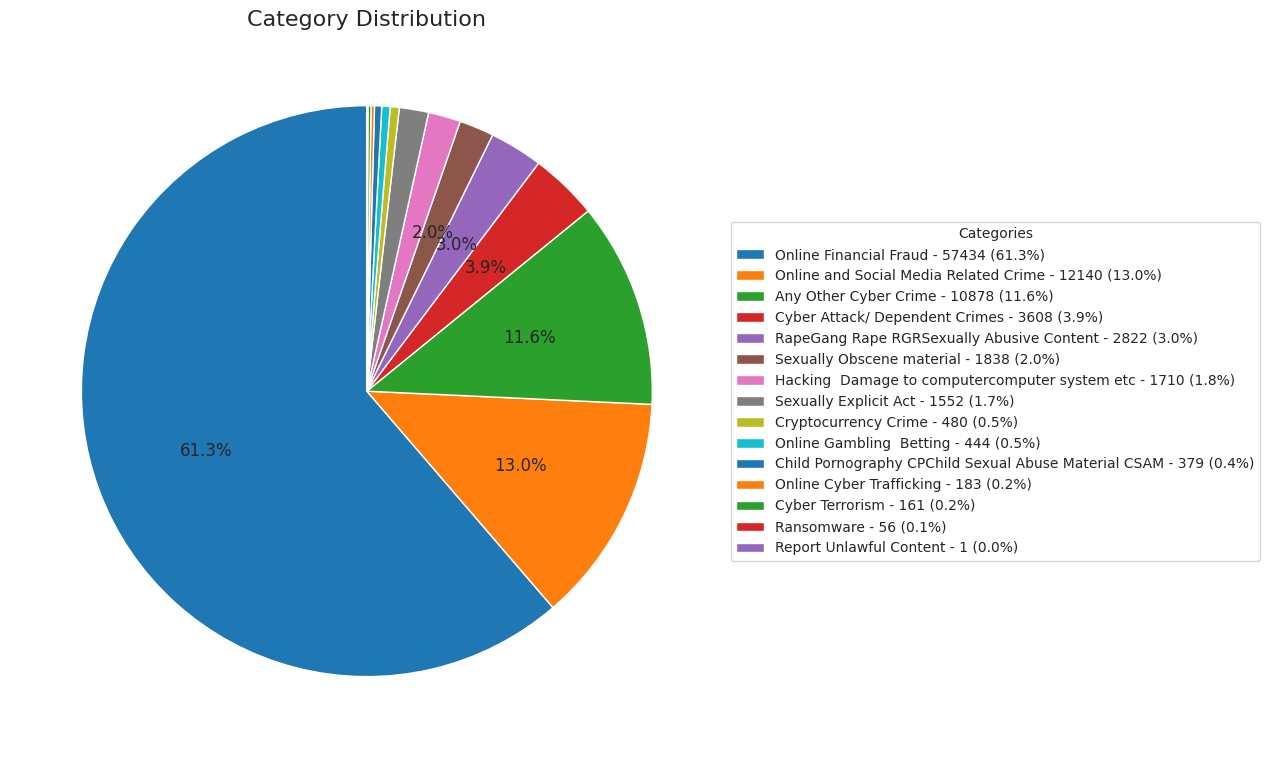

In [ ]:
# Define function to conditionally show percentages only for large slices
def autopct_function(pct, total):
    return ('%1.1f%%' % pct) if pct > 1.9 else ''

# Calculate the total sum of counts once
total_count = category_counts['count'].sum()

# Create the pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(category_counts['count'],
                                   autopct=lambda pct: autopct_function(pct, total_count),
                                   startangle=90,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Equal aspect ratio ensures the pie chart is a circle
plt.gca().set_aspect('equal')

# Add a title
plt.title('Category Distribution', fontsize=16)

# Add a legend with category labels and percentages
legend_labels = [f'{category} - {count} ({(count / total_count) * 100:.1f}%)'
                 for category, count in zip(category_counts['category'], category_counts['count'])]

plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of the legend
plt.show()

**(7) Pie Chart Visualization for Sub-Category Distribution**

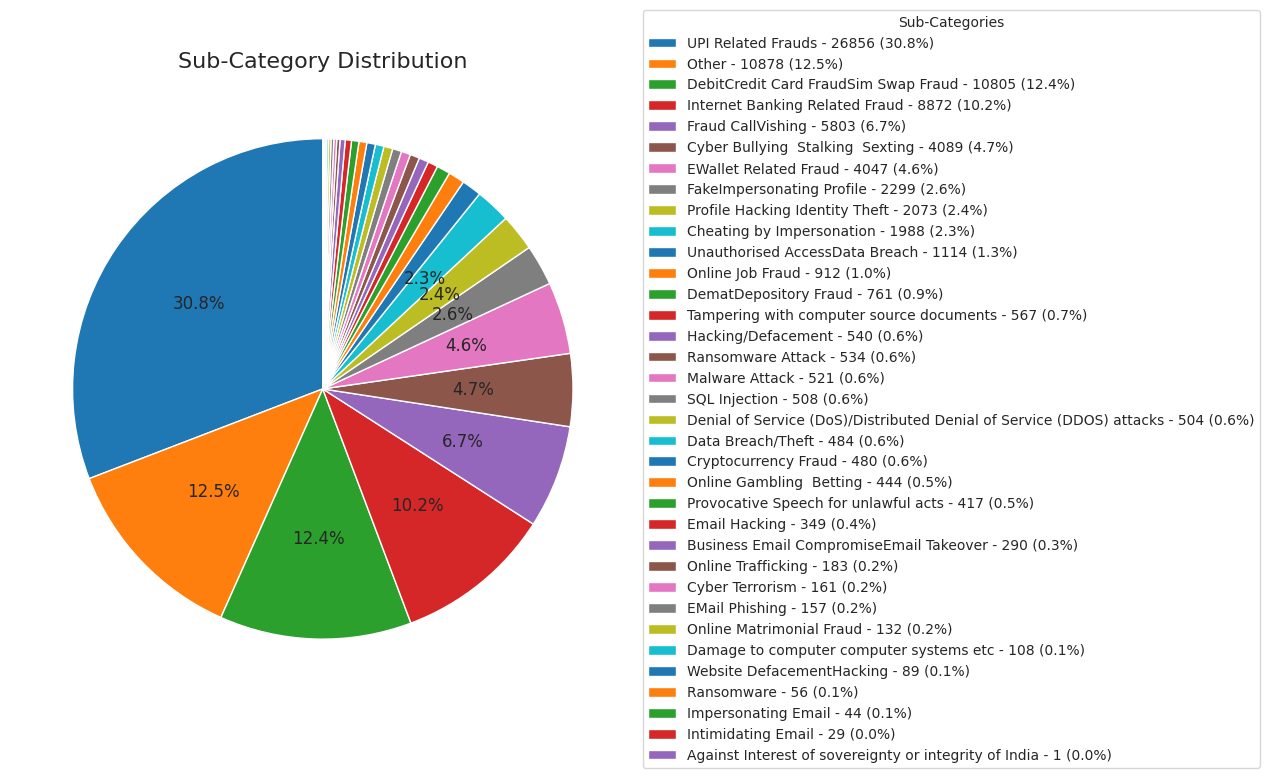

In [ ]:
# Define function to conditionally show percentages only for large slices
def autopct_function(pct, total):
    return ('%1.1f%%' % pct) if pct > 1.9 else ''

# Calculate the total count once
total_count = subcategory_counts['count'].sum()

# Create the pie chart
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(subcategory_counts['count'],
                                   autopct=lambda pct: autopct_function(pct, total_count),
                                   startangle=90,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # Add space between slices

# Equal aspect ratio ensures that the pie chart is a circle
plt.gca().set_aspect('equal')

# Add a title
plt.title('Sub-Category Distribution', fontsize=16)

# Create the legend with category labels and percentages
legend_labels = [f'{subcategory_counts["sub_category"][i]} - {subcategory_counts["count"][i]} ({(subcategory_counts["count"][i] / total_count) * 100:.1f}%)'
                 for i in range(len(subcategory_counts))]
plt.legend(wedges, legend_labels, title="Sub-Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of the legend
plt.show()

**(8) Heatmap of Crime Distribution by Subcategory and Category**


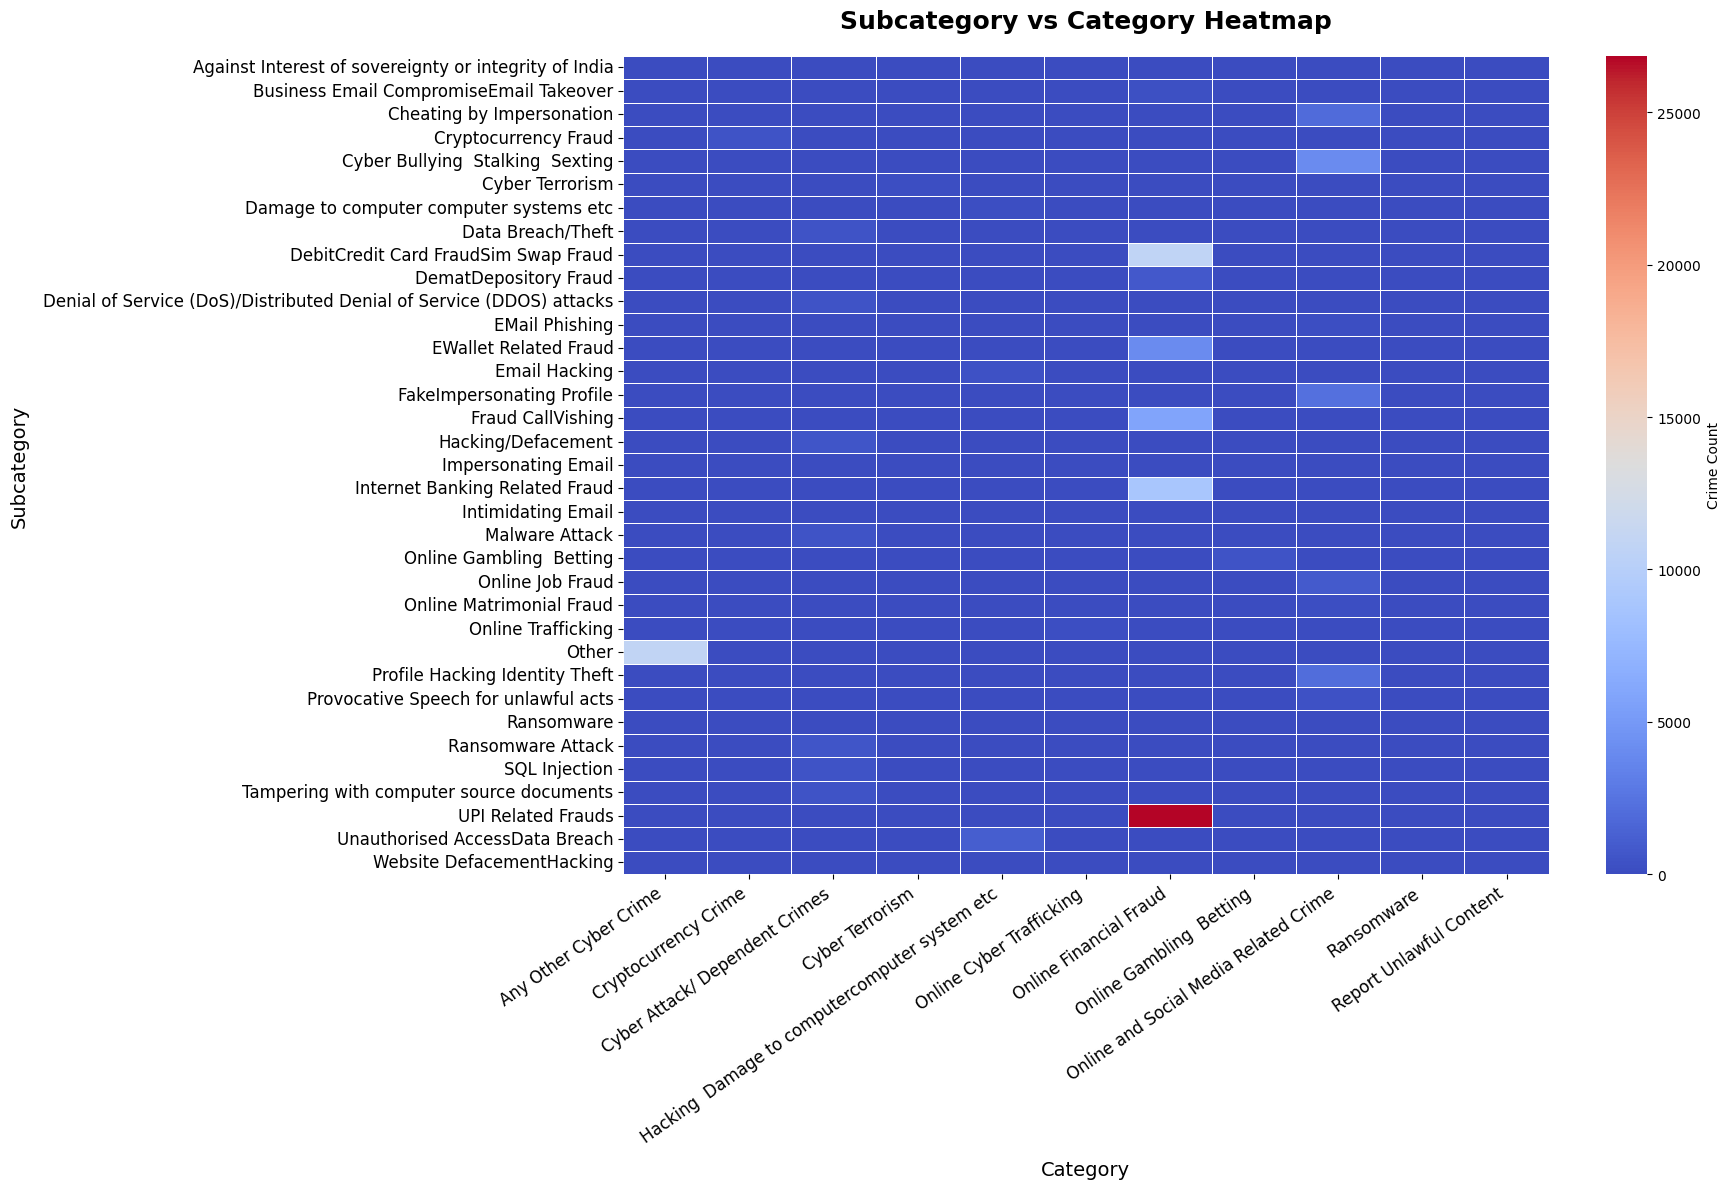

In [ ]:
pivot_table = df.pivot_table(index="sub_category", columns="category", aggfunc="size", fill_value=0)

# Set up the plot dimensions and color map
plt.figure(figsize=(18, 12))
heatmap = sns.heatmap(
    pivot_table,
    annot=False,
    fmt="d",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Crime Count"}
)

# Add titles and labels with adjusted sizes
plt.title("Subcategory vs Category Heatmap", fontsize=18, weight="bold", pad=20)
plt.xlabel("Category", fontsize=14, labelpad=10)
plt.ylabel("Subcategory", fontsize=14, labelpad=10)

# Customize tick labels for better legibility
plt.xticks(rotation=35, fontsize=12, ha="right")
plt.yticks(fontsize=12)


plt.tight_layout()

# Display the plot
plt.show()